In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
import xgboost
from xgboost import XGBClassifier

# from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
df = ('C:\\Users\\DELL\\Downloads\\smart agriculture\\Dataset\\Fertilizer Prediction.csv')

In [3]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\smart agriculture\\Dataset\\Fertilizer Prediction.csv")
df.head

<bound method NDFrame.head of     Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous Fertilizer Name  
0           0            0            Urea  
1           0           36 

In [4]:
df.describe

<bound method NDFrame.describe of     Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous Fertilizer Name  
0           0            0            Urea  
1           0          

In [5]:
df.shape


(99, 9)

In [6]:
df["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [7]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [8]:
df["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [9]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

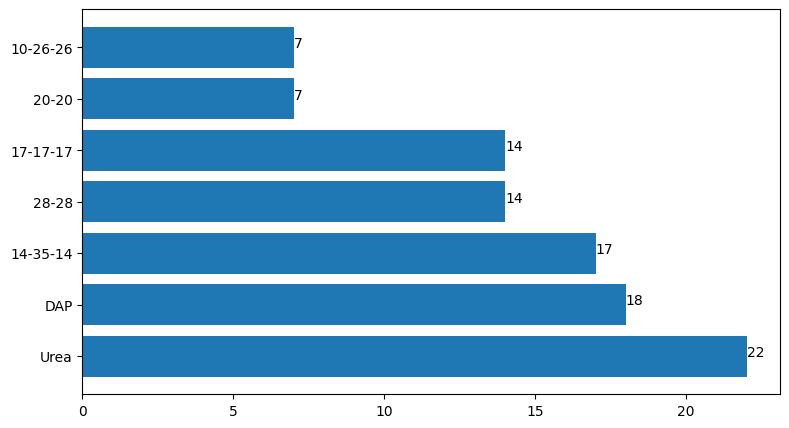

In [10]:
labels = df["Fertilizer Name"].unique()
counts = list(df["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

In [11]:
continuous_df_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_df_cols = ["Soil Type", "Crop Type"]

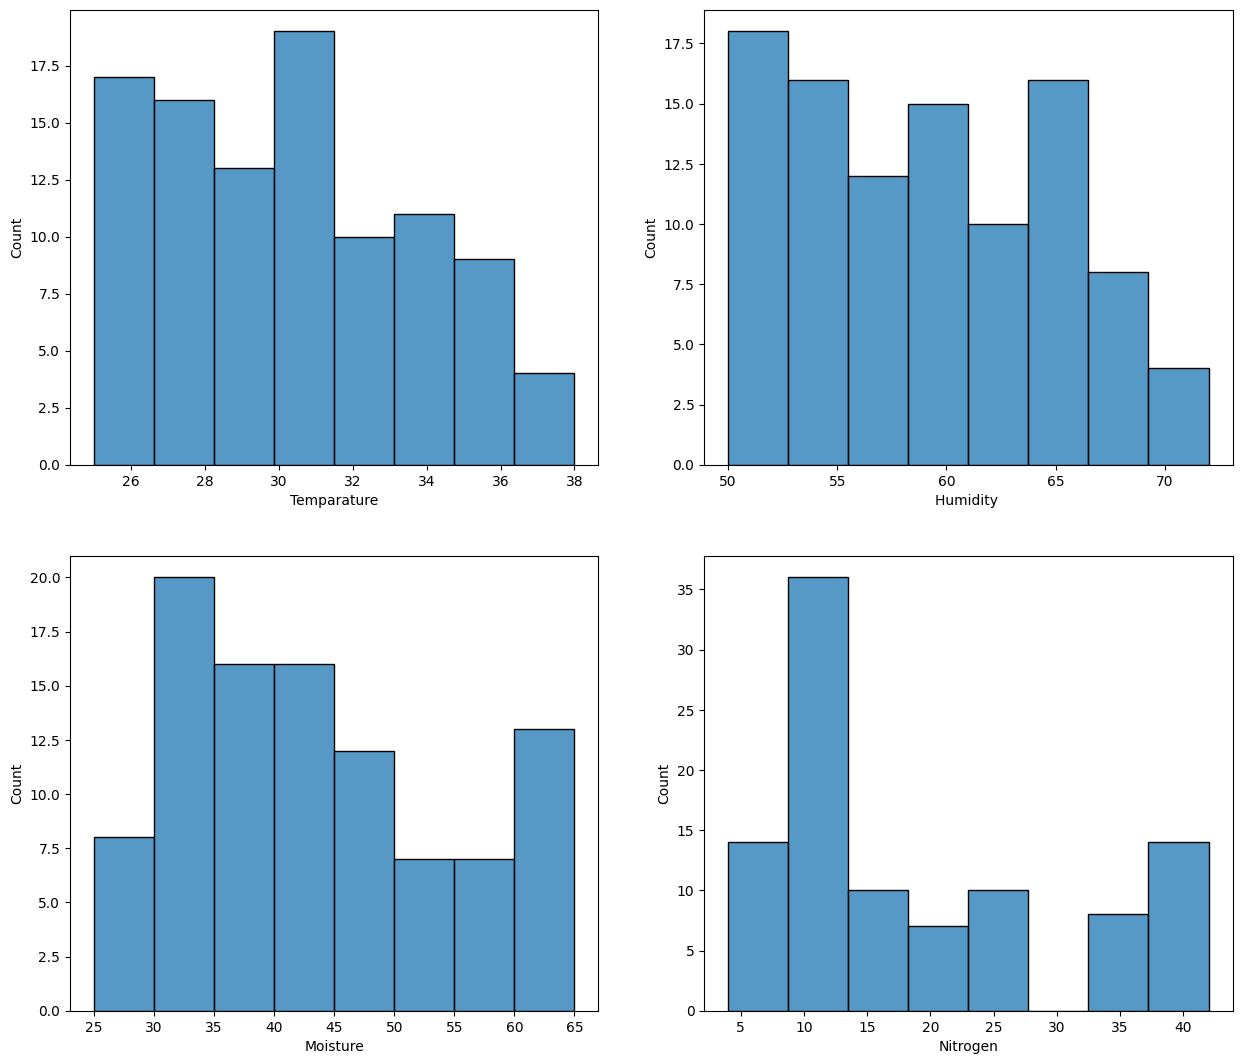

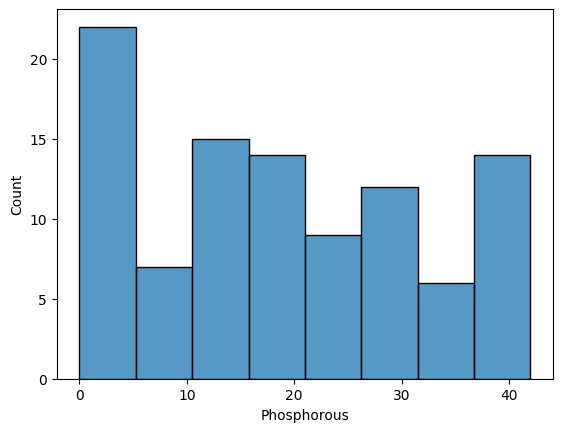

In [12]:
plt.figure(figsize=(15,13))
i = 1
for column in continuous_df_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(df[column])
    i+=1
plt.show()

sns.histplot(df[continuous_df_cols[-1]])
plt.show()

In [13]:
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [14]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [15]:
df.describe(include='all')

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


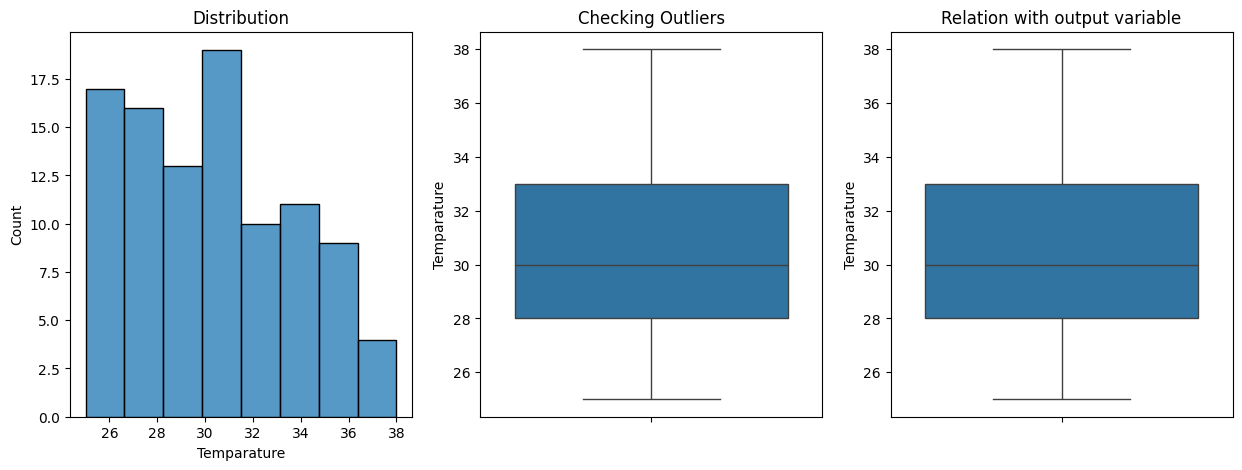

In [16]:
def plot_conti(x):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].set_title('Distribution')
    sns.histplot(x, ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x, ax=axes[1])
    # Use an existing column instead of 'FertilizerName'
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y=x, data=df)  # Use 'data' parameter to specify the DataFrame
    
# Call the function with a valid column name
plot_conti(df['Temparature'])

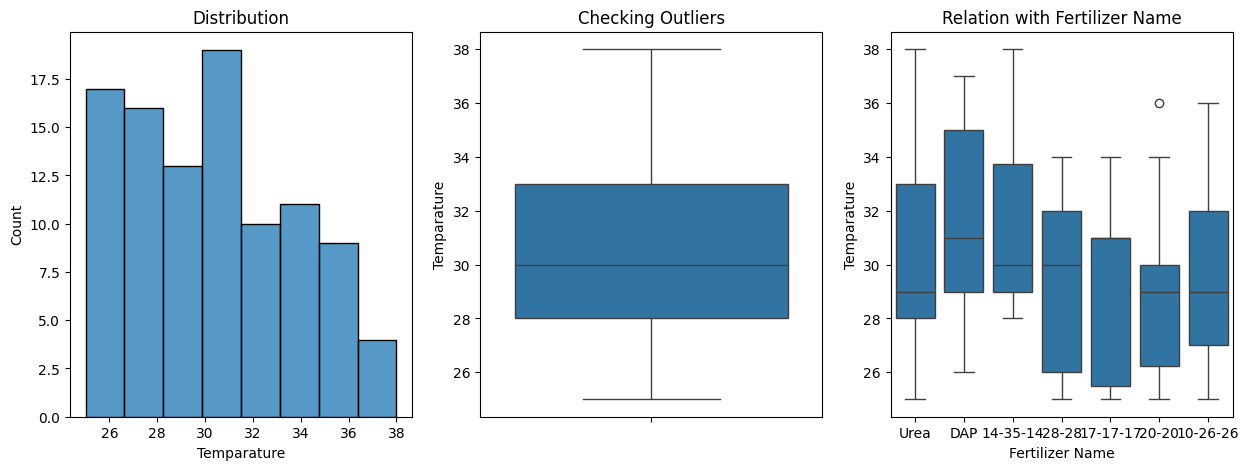

In [17]:
def plot_conti(temp, fertilizer):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].set_title('Distribution')
    sns.histplot(temp, ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(temp, ax=axes[1])
    axes[2].set_title('Relation with Fertilizer Name')
    sns.boxplot(x=fertilizer, y=temp, data=df, ax=axes[2])  # Plot relationship with 'FertilizerName'

# Call the function with 'Temperature' and 'FertilizerName' columns
plot_conti(df['Temparature'], df['Fertilizer Name'])

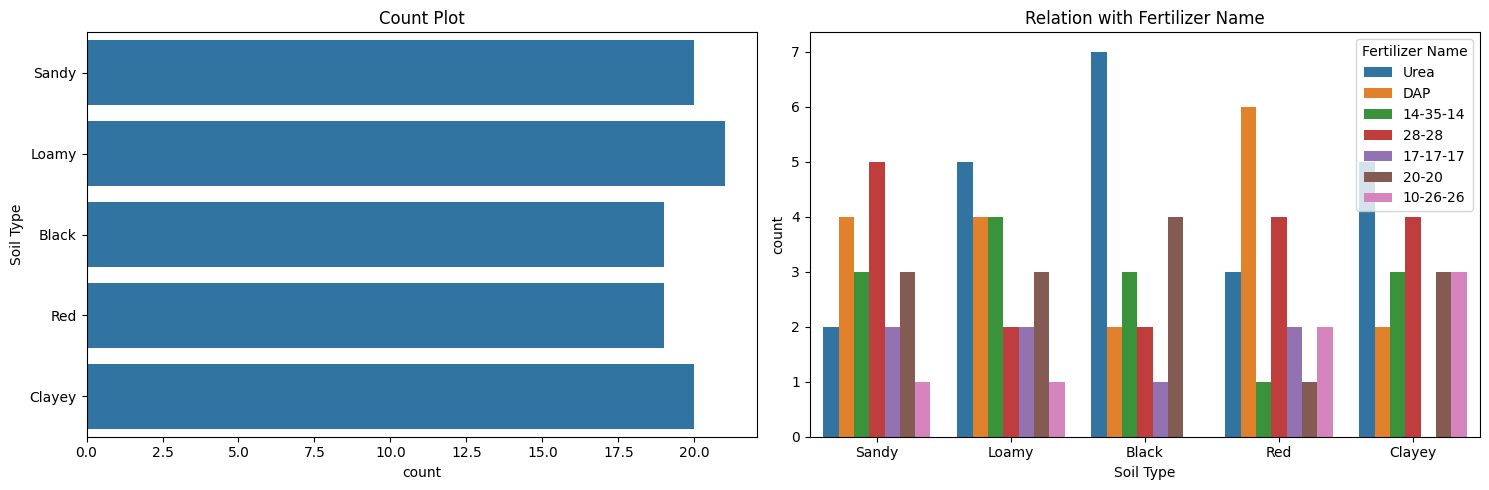

In [18]:
def plot_cato(soil_type, fertilizer):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(soil_type, ax=axes[0])
    axes[1].set_title('Relation with Fertilizer Name')
    sns.countplot(x=soil_type, hue=fertilizer, data=df, ax=axes[1])

# Call the function with 'Soil Type' and 'FertilizerName' columns
plot_cato(df['Soil Type'], df['Fertilizer Name'])

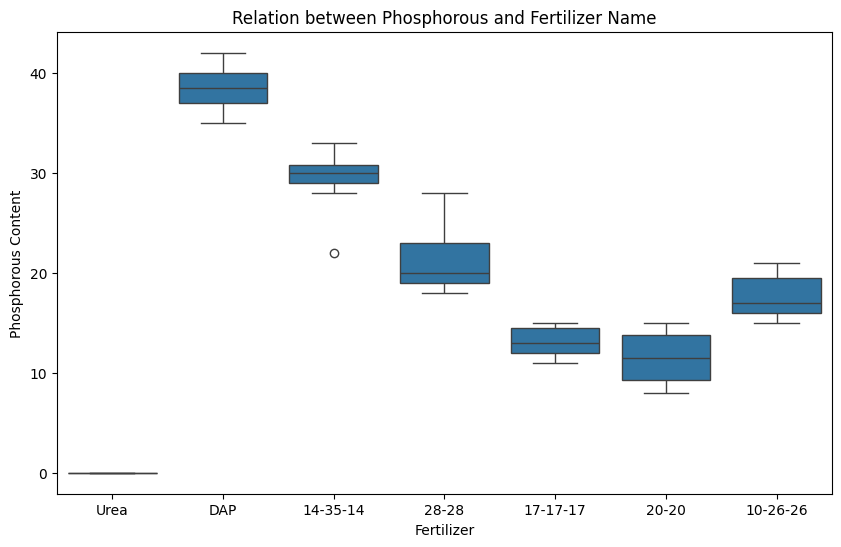

In [19]:
# Assuming 'data' is your DataFrame

def plot_conti(Phosphorous, fertilizer):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fertilizer, y=Phosphorous, data=df)
    plt.title('Relation between Phosphorous and Fertilizer Name')
    plt.xlabel('Fertilizer')
    plt.ylabel('Phosphorous Content')

# Call the function with 'Phosphorous' and 'FertilizerName' columns
plot_conti(df['Phosphorous'], df['Fertilizer Name'])
plt.show()

In [20]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [21]:
# Assuming 'df' is your DataFrame

# Encoding Soil Type variable
encode_soil = LabelEncoder()

# Fitting the label encoder
df['Soil Type Encoded'] = encode_soil.fit_transform(df['Soil Type'])

# Displaying the encoded values
print("Encoded Values:")
print(df[['Soil Type', 'Soil Type Encoded']].drop_duplicates())

Encoded Values:
  Soil Type  Soil Type Encoded
0     Sandy                  4
1     Loamy                  2
2     Black                  0
3       Red                  3
4    Clayey                  1


In [22]:
# Assuming 'df' is your DataFrame

# Encoding Crop Type variable
encode_crop = LabelEncoder()

# Fitting the label encoder
df['Crop Type Encoded'] = encode_crop.fit_transform(df['Crop Type'])

# Creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_, encode_crop.transform(encode_crop.classes_)), columns=['Original', 'Encoded'])

# Displaying the encoded values
print("Encoded Values:")
print(Crop_Type)

Encoded Values:
       Original  Encoded
0        Barley        0
1        Cotton        1
2   Ground Nuts        2
3         Maize        3
4       Millets        4
5     Oil seeds        5
6         Paddy        6
7        Pulses        7
8     Sugarcane        8
9       Tobacco        9
10        Wheat       10


In [23]:
# Assuming 'df' is your DataFrame

# Encoding Fertilizer variable
encode_ferti = LabelEncoder()

# Fitting the label encoder
df['Fertilizer Encoded'] = encode_ferti.fit_transform(df['Fertilizer Name'])

# Creating the DataFrame
Fertilizer_encoded = pd.DataFrame({'Original': df['Fertilizer Name'], 'Encoded': df['Fertilizer Encoded']})

# Dropping duplicate rows to get unique original and encoded pairs
Fertilizer_encoded = Fertilizer_encoded.drop_duplicates().reset_index(drop=True)

# Displaying the encoded values
print("Encoded Values:")
print(Fertilizer_encoded)

Encoded Values:
   Original  Encoded
0      Urea        6
1       DAP        5
2  14-35-14        1
3     28-28        4
4  17-17-17        2
5     20-20        3
6  10-26-26        0


<Figure size 2100x1700 with 0 Axes>

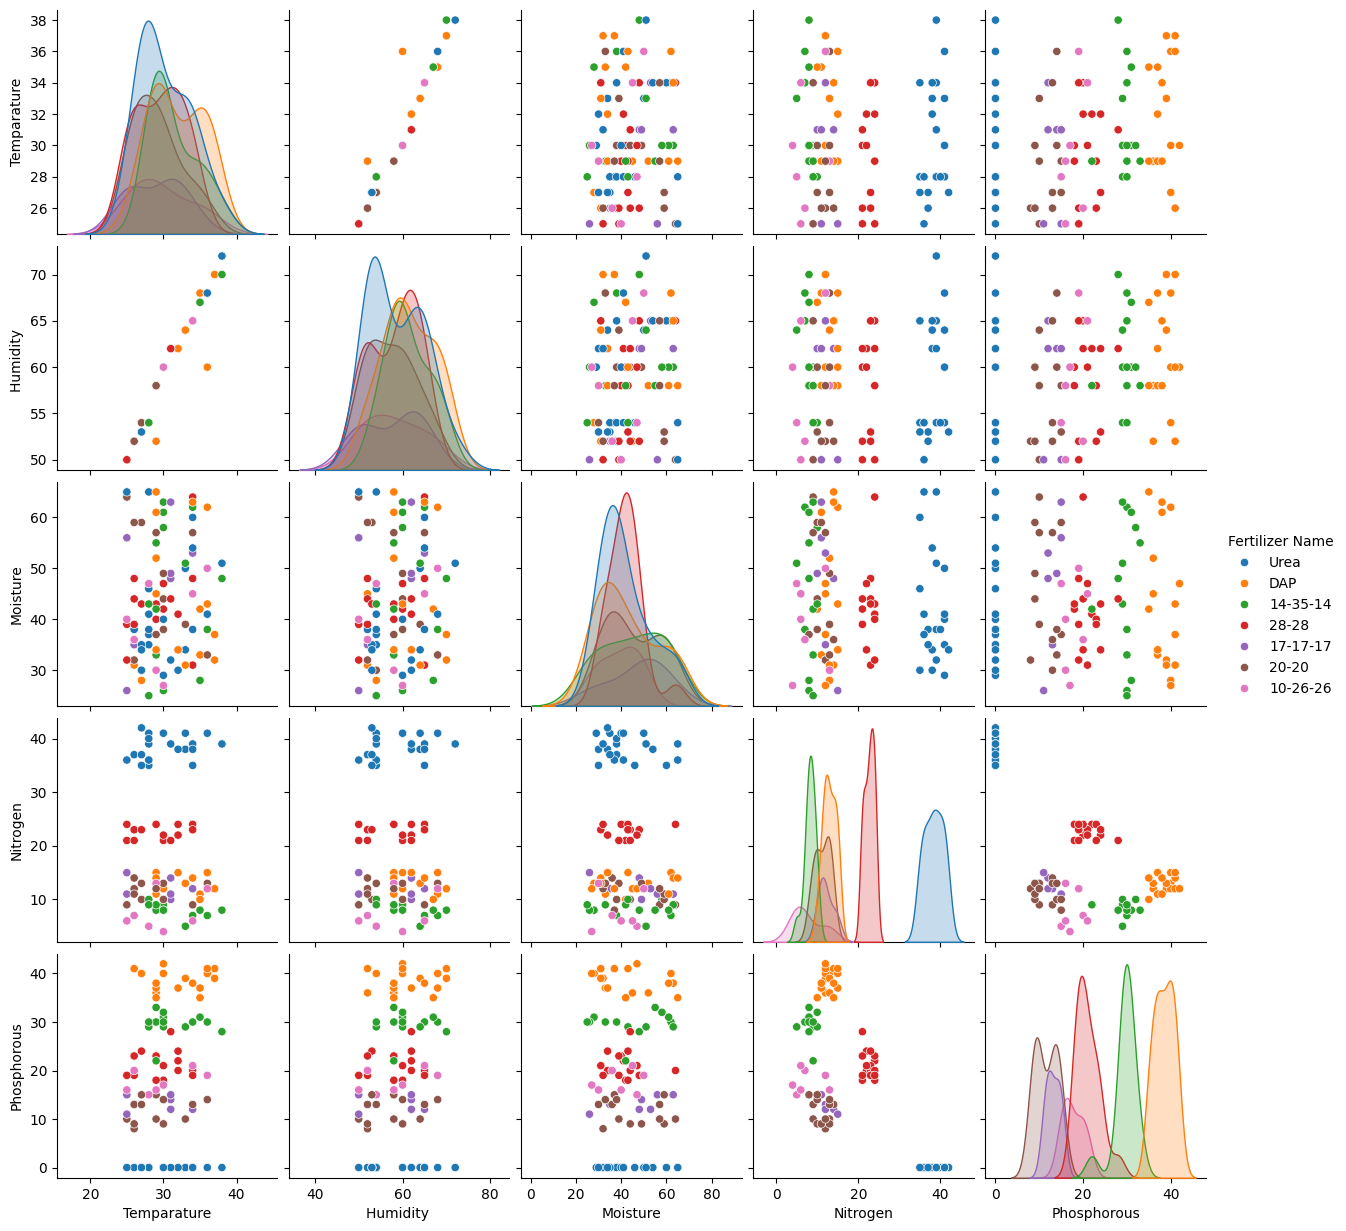

In [24]:
plt.figure(figsize=(21,17))
sns.pairplot(df[continuous_df_cols + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

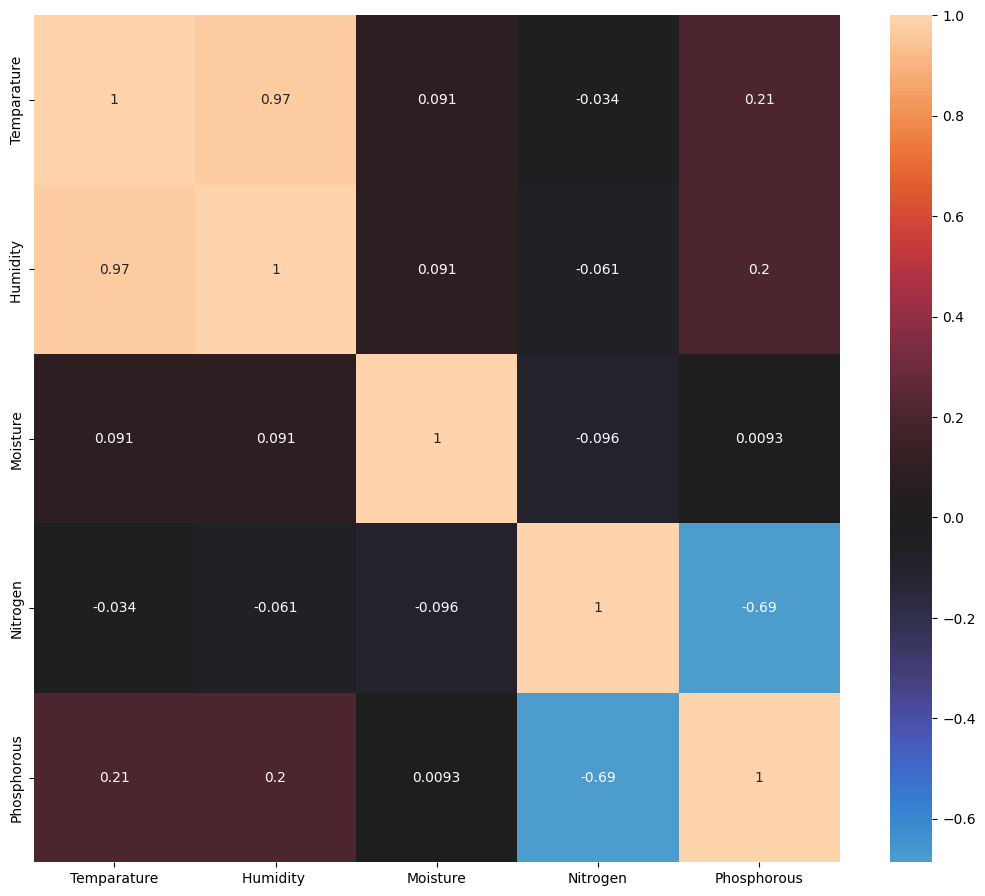

In [25]:
plt.figure(figsize = (13,11))
sns.heatmap(df[continuous_df_cols].corr(), center = 0, annot = True)
plt.show()

In [26]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [27]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 4: 17, 1: 14, 3: 14, 2: 7, 0: 7})

In [28]:
# Assuming 'x' contains your feature data
label_encoders = {}
for column in x.columns:
    if x[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        x[column] = label_encoders[column].fit_transform(x[column])

In [29]:
upsample = SMOTE()
x, y = upsample.fit_resample(x, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [30]:
print(f"Total Data after Upsampling: {len(x)}")

Total Data after Upsampling: 154


In [31]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)


In [32]:

print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Train Data: {x_test.shape}, {y_test.shape}")

Train Data: (123, 11), (123,)
Train Data: (31, 11), (31,)


In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 19 to 37
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Temparature        123 non-null    int64
 1   Humidity           123 non-null    int64
 2   Moisture           123 non-null    int64
 3   Soil Type          123 non-null    int32
 4   Crop Type          123 non-null    int32
 5   Nitrogen           123 non-null    int64
 6   Potassium          123 non-null    int64
 7   Phosphorous        123 non-null    int64
 8   Fertilizer Name    123 non-null    int32
 9   Soil Type Encoded  123 non-null    int32
 10  Crop Type Encoded  123 non-null    int32
dtypes: int32(5), int64(6)
memory usage: 9.1 KB


Accuracy at k = 1 is 0.9032258064516129
Accuracy at k = 2 is 0.8064516129032258
Accuracy at k = 3 is 0.8064516129032258
Accuracy at k = 4 is 0.8387096774193549
Accuracy at k = 5 is 0.8064516129032258
Accuracy at k = 6 is 0.6774193548387096
Accuracy at k = 7 is 0.6774193548387096
Accuracy at k = 8 is 0.6129032258064516
Accuracy at k = 9 is 0.7096774193548387
Accuracy at k = 10 is 0.6451612903225806
Accuracy at k = 11 is 0.6451612903225806
Accuracy at k = 12 is 0.6451612903225806
Accuracy at k = 13 is 0.6451612903225806
Accuracy at k = 14 is 0.6129032258064516
Accuracy at k = 15 is 0.6774193548387096
Accuracy at k = 16 is 0.6451612903225806
Accuracy at k = 17 is 0.5483870967741935
Accuracy at k = 18 is 0.6129032258064516
Accuracy at k = 19 is 0.5161290322580645
Accuracy at k = 20 is 0.5161290322580645
Accuracy at k = 21 is 0.4838709677419355
Accuracy at k = 22 is 0.4838709677419355
Accuracy at k = 23 is 0.41935483870967744
Accuracy at k = 24 is 0.3870967741935484
Accuracy at k = 25 is 0.

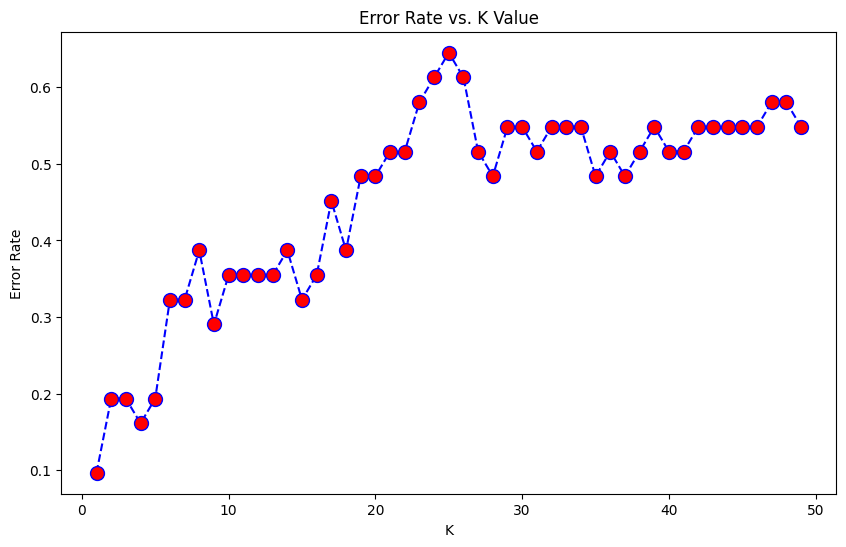

In [34]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [35]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  #, mean_absolute_percentage_error

In [36]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [37]:
pred_rand = rand.fit(x_train,y_train).predict(x_test)

print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [38]:
y_pred=rand.predict(x_test)

In [39]:
lr_MSE=mean_squared_error(y_test,y_pred)
lr_RMSE=np.sqrt(pred_rand)
lr_MAE=mean_absolute_error(y_test,y_pred)
# mlr_MAPE=mean_absolute_percentage_error(y_test,y_pred)
lr_r2score=r2_score(y_test,y_pred)

print("Mean Square Error :",lr_MSE)
print("\nRoot Mean Square Error :",lr_RMSE)
print("\nMean Absolute Error :",lr_MAE)
print("\nAccuracy :",lr_r2score*100,"%")

Mean Square Error : 0.0

Root Mean Square Error : [2.23606798 1.         1.73205081 2.         2.23606798 0.
 2.23606798 2.23606798 2.23606798 2.23606798 2.         2.23606798
 0.         0.         1.41421356 1.         2.44948974 1.73205081
 2.23606798 0.         0.         1.41421356 2.44948974 0.
 1.         1.73205081 1.73205081 2.         1.41421356 1.
 2.44948974]

Mean Absolute Error : 0.0

Accuracy : 100.0 %


In [40]:
#pickling the file
import pickle
pickle_out = open('Logistic.pkl','wb')
pickle.dump(pred_rand,pickle_out)
pickle_out.close()

In [41]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

Accuracy on Test Data: 96.7741935483871%


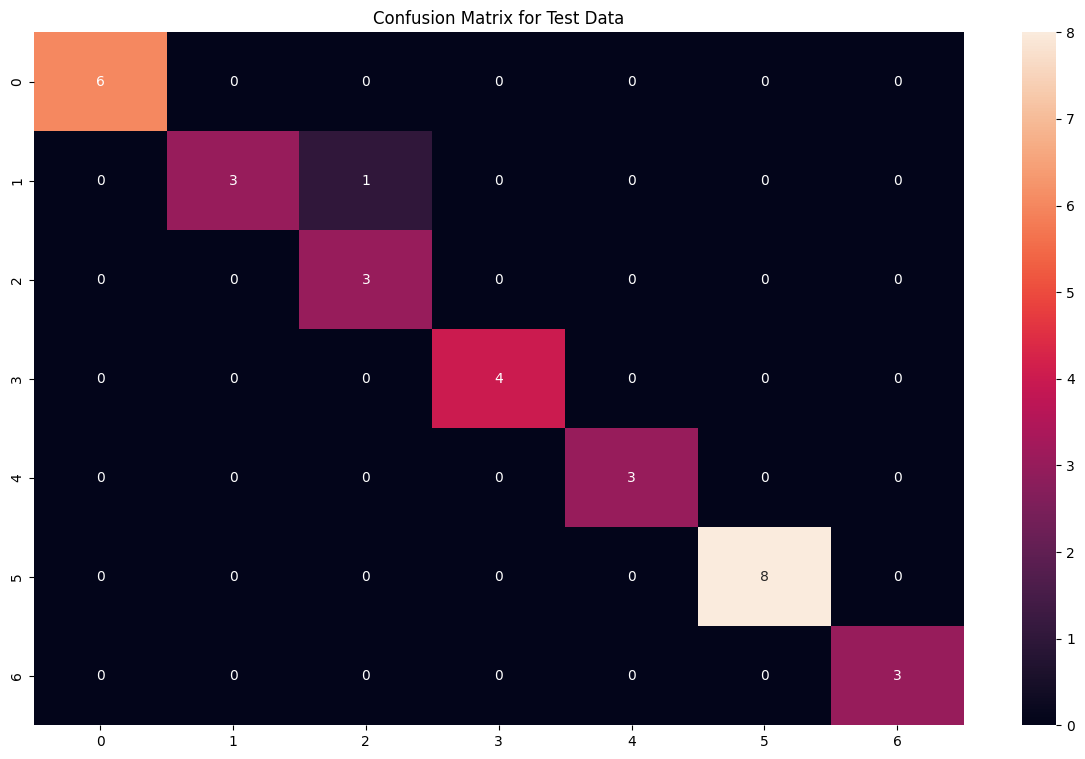


Accuracy on Whole Data: 99.35064935064936%


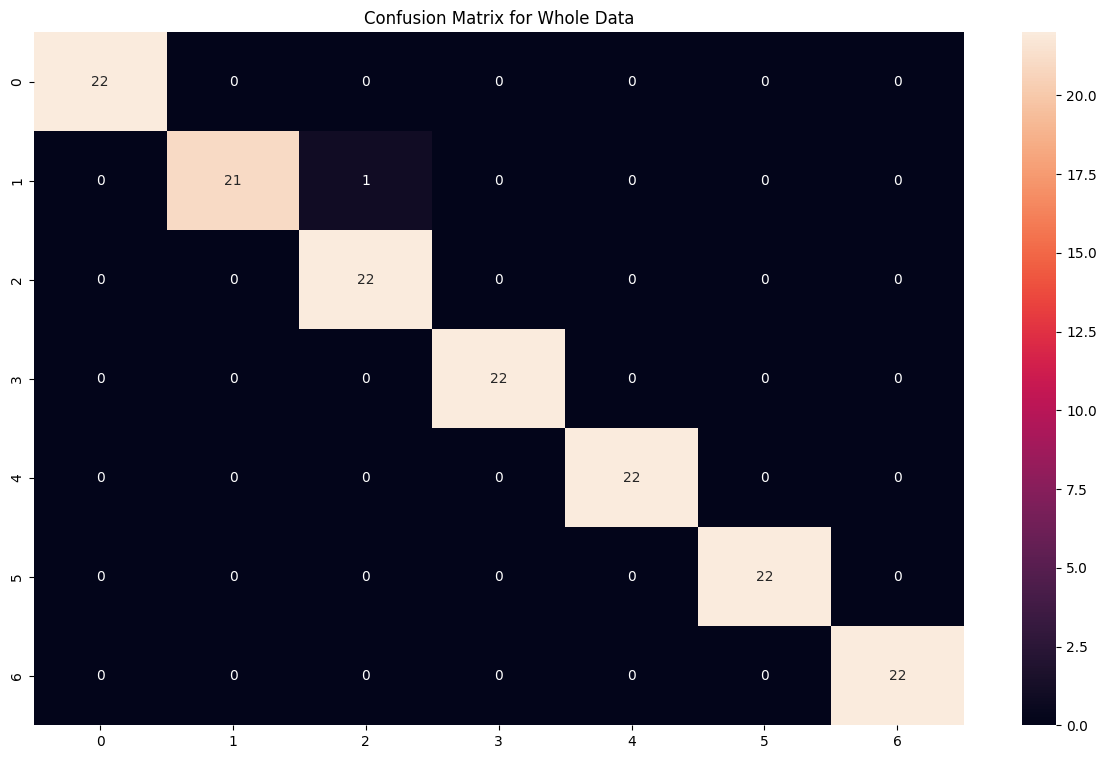

In [42]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(x_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = svm_pipeline.predict(x.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Accuracy on Test Data: 100.0%


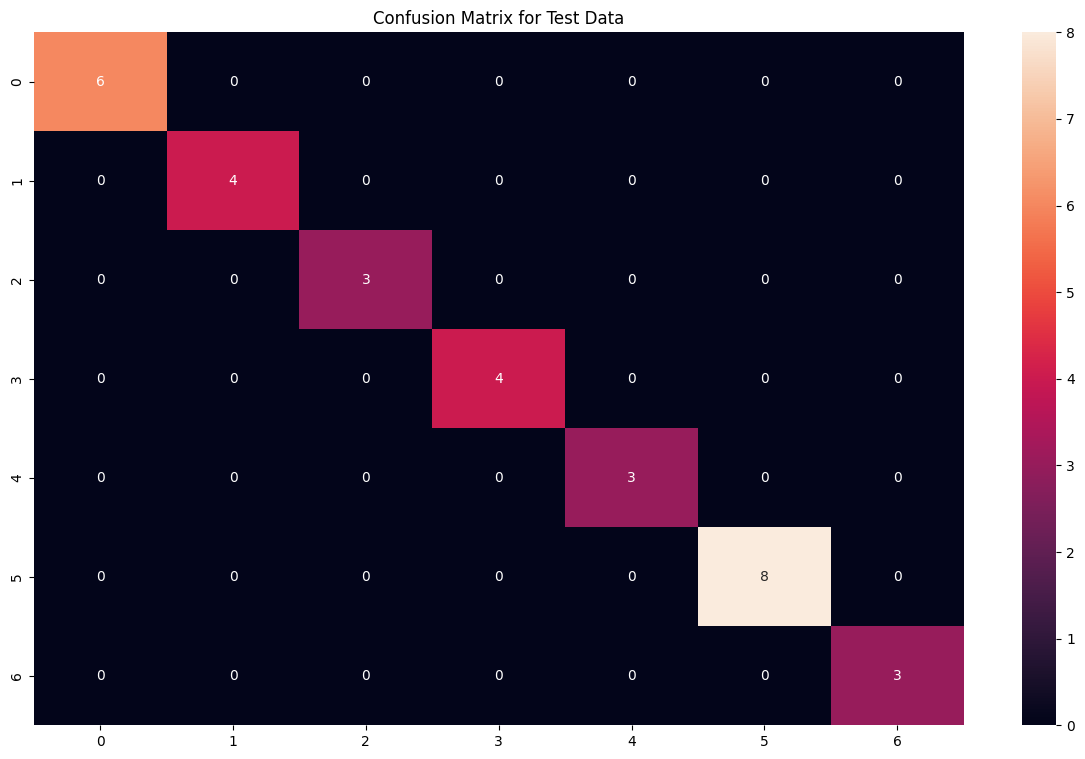


Accuracy on Whole Data: 100.0%


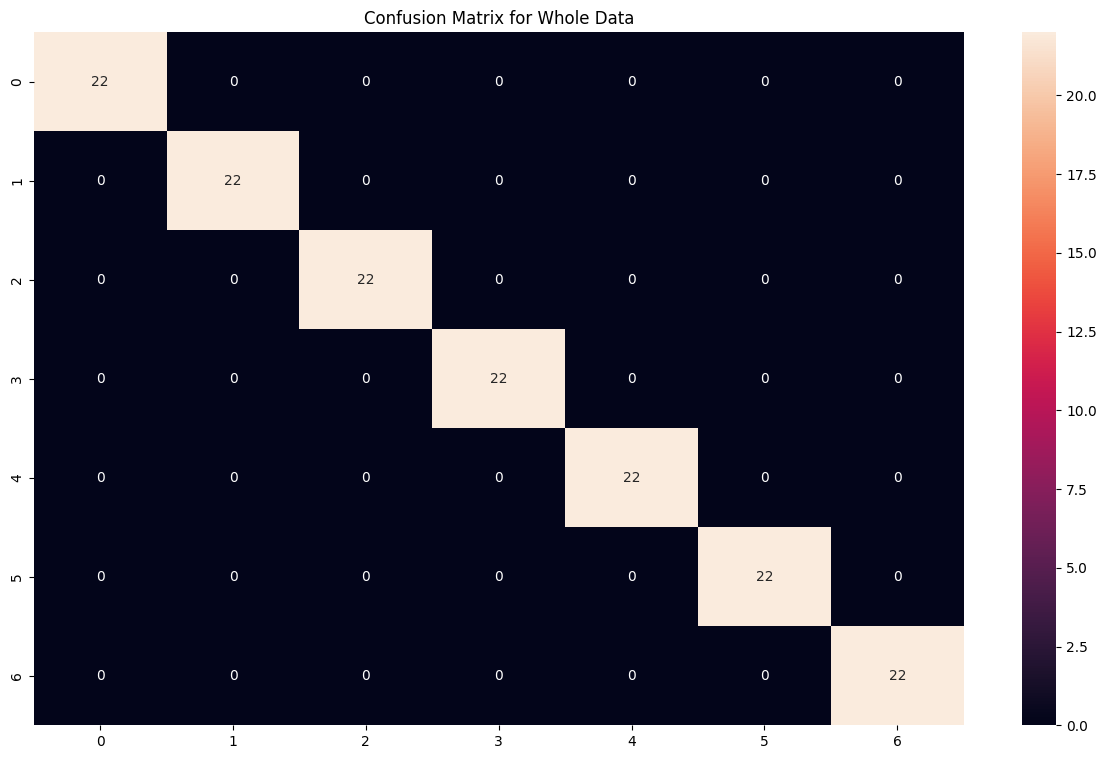

In [43]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(x_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(x.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Accuracy on Test Data: 100.0%


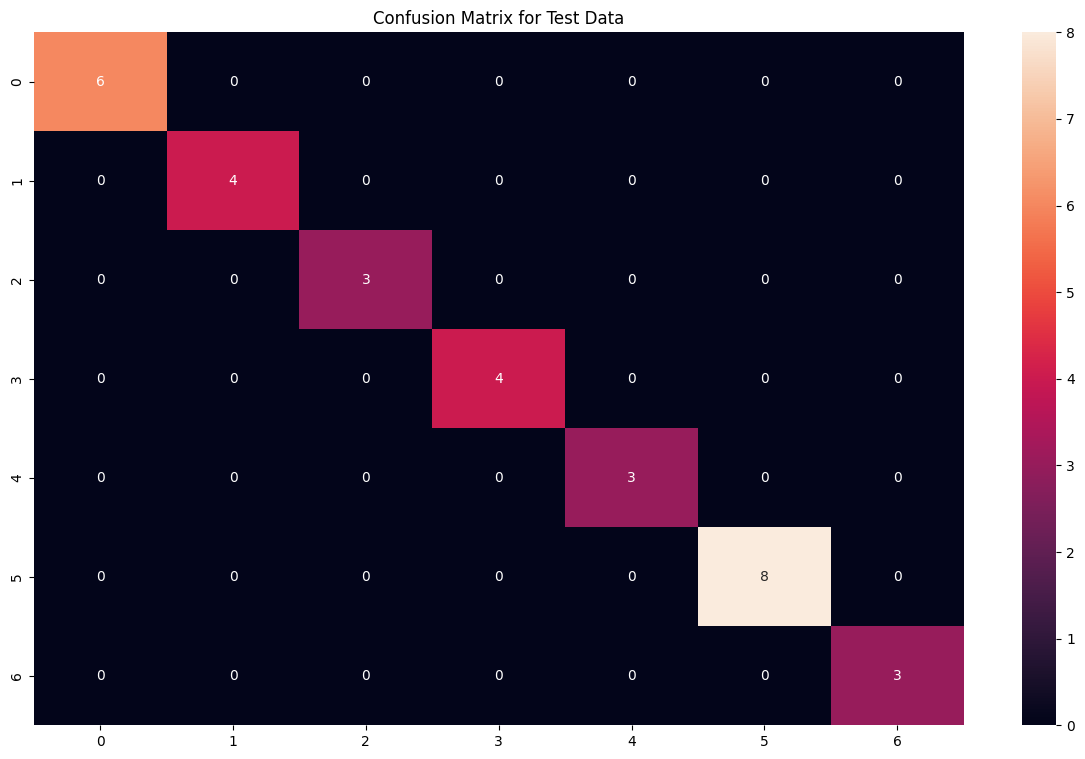


Accuracy on Whole Data: 100.0%


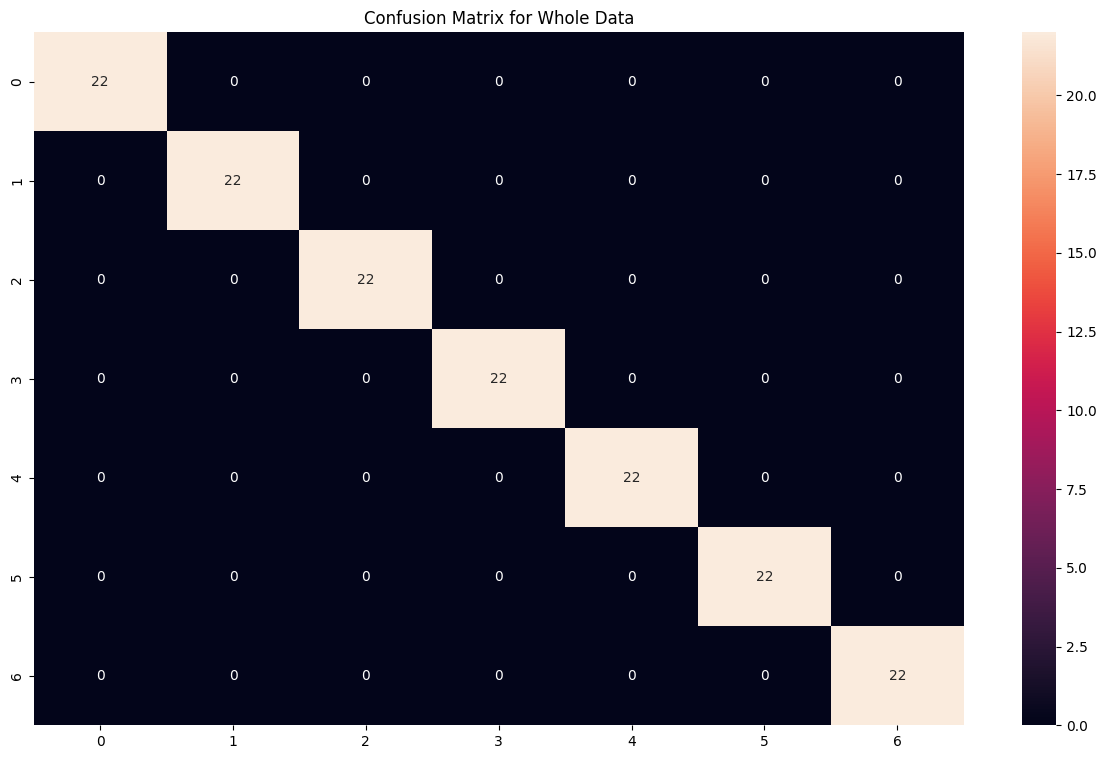

In [44]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(x_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(x.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [45]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=1000))
])

In [46]:
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000))])

In [47]:
# Evaluate the performance of the model on the training data
train_score = model.score(x_train, y_train)
print('Training score:', train_score)

# Evaluate the performance of the model on the testing data
test_score = model.score(x_test, y_test)
print('Testing score:', test_score)

Training score: 0.9914419193512859
Testing score: 0.9869171841057529


In [48]:
# test_loss, test_acc = model.evaluate(x_test, y_test)
#print('Test accuracy:', test_acc*100)

In [49]:
#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [50]:
model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [51]:
train_score = model.score(X_train, y_train)
print('Training score:', train_score)

test_score = model.score(X_test, y_test)
print('Testing score:', test_score)

Training score: 0.9906435213805678
Testing score: 0.9902875407874989


In [52]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
input_layer_size = X_train.shape[1]
hidden_layer_size = 32
output_layer_size = len(np.unique(y_train))

# Initialize the weights randomly
W1 = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
b1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
b2 = np.zeros((1, output_layer_size))

In [55]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [56]:
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def softmax_derivative(x):
    return softmax(x) * (1 - softmax(x))

def cross_entropy(y_pred, y_true):
    m = y_true.shape[0]
    p = softmax(y_pred)
    log_likelihood = -np.log(p[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

def cross_entropy_derivative(y_pred, y_true):
    m = y_true.shape[0]
    grad = softmax(y_pred)
    grad[range(m), y_true] -= 1
    grad /= m
    return grad

In [57]:
learning_rate = 0.01
epochs = 1500
train_losses = []
test_losses = []

for i in range(epochs):
    # Forward propagation
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = np.argmax(z2, axis=1)

    # Compute the loss and accuracy on the training set
    train_loss = cross_entropy(z2, y_train)
    train_losses.append(train_loss)
    train_acc = accuracy_score(y_train, y_pred)

    # Backward propagation
    delta2 = cross_entropy_derivative(z2, y_train)
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    delta1 = np.dot(delta2, W2.T) * relu_derivative(z1)
    dW1 = np.dot(X_train.T, delta1)
    db1 = np.sum(delta1, axis=0)

    # Update the weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Evaluate the model on the test set
    z1_test = np.dot(X_test, W1) + b1
    a1_test = relu(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    y_pred_test = np.argmax(z2_test, axis=1)
    test_loss = cross_entropy(z2_test, y_test)
    test_losses.append(test_loss)
    test_acc = accuracy_score(y_test, y_pred_test)

    # Print the training loss, training accuracy, test loss, and test accuracy every 100 epochs
    if i % 100 == 0:
        print("Epoch: %d, Train Loss: %f, Train Accuracy: %f, Test Loss: %f, Test Accuracy: %f" % (i, train_loss, train_acc, test_loss, test_acc))

Epoch: 0, Train Loss: 2.068986, Train Accuracy: 0.186992, Test Loss: 2.075143, Test Accuracy: 0.064516
Epoch: 100, Train Loss: 1.444063, Train Accuracy: 0.544715, Test Loss: 1.482270, Test Accuracy: 0.548387
Epoch: 200, Train Loss: 1.144697, Train Accuracy: 0.691057, Test Loss: 1.186135, Test Accuracy: 0.645161
Epoch: 300, Train Loss: 0.945447, Train Accuracy: 0.796748, Test Loss: 0.985375, Test Accuracy: 0.709677
Epoch: 400, Train Loss: 0.794639, Train Accuracy: 0.861789, Test Loss: 0.833045, Test Accuracy: 0.838710
Epoch: 500, Train Loss: 0.673537, Train Accuracy: 0.943089, Test Loss: 0.712775, Test Accuracy: 0.935484
Epoch: 600, Train Loss: 0.573480, Train Accuracy: 0.983740, Test Loss: 0.615589, Test Accuracy: 0.967742
Epoch: 700, Train Loss: 0.490690, Train Accuracy: 1.000000, Test Loss: 0.535932, Test Accuracy: 0.967742
Epoch: 800, Train Loss: 0.422153, Train Accuracy: 1.000000, Test Loss: 0.471182, Test Accuracy: 0.967742
Epoch: 900, Train Loss: 0.364946, Train Accuracy: 1.00000